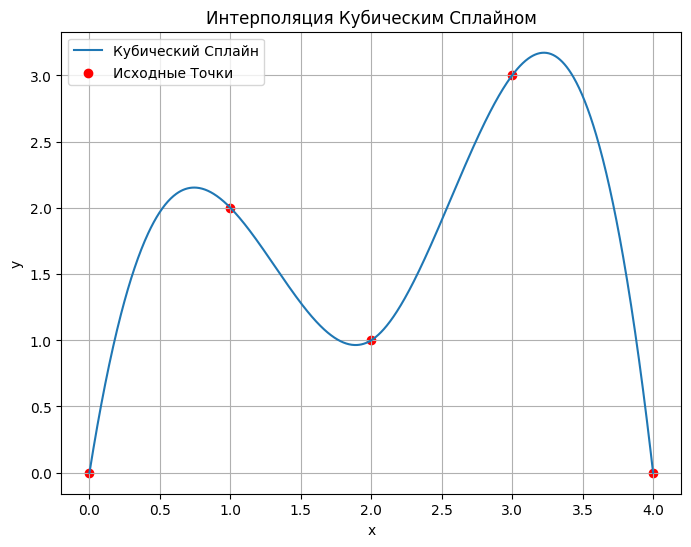

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline
import ipywidgets as widgets
from IPython.display import display, clear_output

def generate_cubic_spline(points):
    """
    Генерация кубического сплайна на основе заданных точек.

    Параметры:
    points (np.array): Массив точек, где каждая строка - это точка (x, y).

    Возвращает:
    CubicSpline: Объект кубического сплайна.
    """
    x = points[:, 0]
    y = points[:, 1]
    return CubicSpline(x, y)

def plot_spline(spline, points, num_points=1000):
    """
    Отрисовка кубического сплайна и исходных точек.

    Параметры:
    spline (CubicSpline): Объект кубического сплайна.
    points (np.array): Массив точек, использованных для создания сплайна.
    num_points (int): Количество точек для отрисовки сплайна.
    """
    x_min, x_max = points[:, 0].min(), points[:, 0].max()
    x_vals = np.linspace(x_min, x_max, num_points)
    plt.figure(figsize=(8, 6))
    plt.plot(x_vals, spline(x_vals), label='Кубический Сплайн')
    plt.scatter(points[:, 0], points[:, 1], color='red', label='Исходные Точки')
    plt.legend()
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Интерполяция Кубическим Сплайном')
    plt.grid(True)
    plt.show()

# Начальные тестовые точки
initial_points = np.array([[0, 0], [1, 2], [2, 1], [3, 3], [4, 0]])

# Создание виджетов для каждой точки
point_widgets = []
for i, point in enumerate(initial_points):
    x_widget = widgets.FloatSlider(value=point[0], min=-10, max=10, step=0.1, description=f'X{i}:')
    y_widget = widgets.FloatSlider(value=point[1], min=-10, max=10, step=0.1, description=f'Y{i}:')
    point_widgets.append((x_widget, y_widget))

def update_plot(change):
    """
    Обновление графика при изменении значений виджетов.
    """
    new_points = np.array([[x.value, y.value] for x, y in point_widgets])
    new_spline = generate_cubic_spline(new_points)
    clear_output(wait=True)
    display(container)
    plot_spline(new_spline, new_points)

for x_widget, y_widget in point_widgets:
    x_widget.observe(update_plot, names='value')
    y_widget.observe(update_plot, names='value')

container = widgets.VBox([widgets.HBox([x, y]) for x, y in point_widgets])
display(container)
update_plot(None)
